# <font color='blue'>Oi Polloi CRM Sales Analysis :</font>

#### - Kinsuk Ghatak
#### 9038426200
#### kinsukghatak@gmail.com 


## <font color='red'>A. Exploratory and Descriptive analysis on the transaction data set </font> :

In [1]:
## EDA Codes : 

# pip install dtale

import pandas as pd

import numpy as np
import matplotlib as plt

df_polloi_master=pd.read_excel("H:/Kinsuk/DS_Freelancing/RTB_Analyttica/Oi_Polloi_CRM_Analysis_Dec21/Master data Master whitelabeled - 012018- 112021.xlsx")



print("length of the data set :",len(df_polloi_master))
print("Total Columns of the data set :",len(df_polloi_master.columns))
# print("# of unique customers in the entire tenure from 2016 to 2021 :",len(df_acai.username.unique()))



length of the data set : 233454
Total Columns of the data set : 77


In [2]:
vars_to_keep=['Name','username','Financial Status','Accepts Marketing','Currency','Total','Subtotal',\
              'Discount Amount','Created at','Lineitem quantity','Lineitem name','Lineitem price',\
              'Lineitem sku','Billing City','Billing Zip','Billing Province','Billing Country','Billing Province Name','Payment Method',
              'Refunded Amount','Vendor','Outstanding Balance','Shipping Country','Shipping City','Shipping Zip','Shipping Province Name']

df_polloi_filt_col=df_polloi_master[vars_to_keep]
df_polloi_filt_col.head(2)

,Name,username,Financial Status,Accepts Marketing,Currency,Total,Subtotal,Discount Amount,Created at,Lineitem quantity,...,Billing Country,Billing Province Name,Payment Method,Refunded Amount,Vendor,Outstanding Balance,Shipping Country,Shipping City,Shipping Zip,Shipping Province Name
0,#290700,oliverhipwell,paid,no,GBP,100.0,100.0,0.0,2021-11-24 18:23:30 +0000,1,...,GB,England,Shopify Payments,0.0,Frizmworks,0.0,GB,Folkestone,CT19 5HP,England
1,#290699,gailellis2015,paid,no,GBP,83.0,77.0,0.0,2021-11-24 18:22:39 +0000,1,...,GB,England,PayPal Express Checkout,0.0,Folk,0.0,GB,Cambridge,CB1 8RX,England


In [3]:
##Pre processing and MVI for rolling up information at transaction level :

from datetime import datetime
import calendar
import warnings
warnings.filterwarnings('ignore')

print(df_polloi_filt_col['Created at'].dtypes)

from pandas.api.types import CategoricalDtype

cats = [ 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
cat_type = CategoricalDtype(categories=cats, ordered=True)


cats_month = [ 'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul','Aug','Sep','Oct','Nov','Dec']
cats_month_type = CategoricalDtype(categories=cats_month, ordered=True)


cats_year = [ '2017','2018','2019','2020','2021']
cats_year_type = CategoricalDtype(categories=cats_year, ordered=True)



df_polloi_filt_col['Total'] = pd.to_numeric(df_polloi_filt_col['Total'],errors = 'coerce')


df_polloi_filt_col['date_string']=df_polloi_filt_col['Created at'].str[:10]

df_polloi_filt_col['Date']  = pd.to_datetime(df_polloi_filt_col['date_string'])

# df_polloi_filt_col['month_year'] = df_polloi_filt_col['Date'].dt.strftime('%b-%Y')
df_polloi_filt_col['month'] = df_polloi_filt_col['Date'].dt.strftime('%b').astype(cats_month_type)
df_polloi_filt_col['year'] = df_polloi_filt_col['Date'].dt.strftime('%Y').astype(cats_year_type)
df_polloi_filt_col['month_year']=df_polloi_filt_col['month'].astype(str)+'-'+df_polloi_filt_col['year'].astype(str)

df_polloi_filt_col['year-month']=df_polloi_filt_col['Date'].dt.to_period('M')

df_polloi_filt_col['Day'] = df_polloi_filt_col['Date'].dt.strftime('%A').astype(cat_type)

df_polloi_filt_col=df_polloi_filt_col.drop(columns='date_string').copy()




## missing value filling up :
vars_ffill= ['Financial Status','Accepts Marketing','Shipping Country','Shipping City','Shipping Zip','Shipping Province Name',\
             'Billing City','Billing Zip','Billing Province','Billing Country','Billing Province Name']

for col in vars_ffill:
    df_polloi_filt_col[col]=df_polloi_filt_col[col].ffill()
    




# df_polloi_filt_col.to_csv('C:/Users/KINSUK/Desktop/DS_Freelancing/RTB_Analyttica/Acai_Sales_Analysis_May2021/Processed_Sales_Data.csv')

print("Total number of unique SKUs %d : "  % len(df_polloi_filt_col['Lineitem name'].unique()))
print("Total number of unique Lineitem description %d : "  % len(df_polloi_filt_col['Lineitem name'].unique()))
print("Total number of unique Customers %d : "  % len(df_polloi_filt_col['Name'].unique()))

print(pd.crosstab(df_polloi_filt_col['year'], columns='count'))

df_polloi_filt_col.head(3)



object
Total number of unique SKUs 39315 : 
Total number of unique Lineitem description 39315 : 
Total number of unique Customers 153419 : 
col_0  count
year        
2017      23
2018   78994
2019   86434
2020   36232
2021   31771


,Name,username,Financial Status,Accepts Marketing,Currency,Total,Subtotal,Discount Amount,Created at,Lineitem quantity,...,Shipping Country,Shipping City,Shipping Zip,Shipping Province Name,Date,month,year,month_year,year-month,Day
0,#290700,oliverhipwell,paid,no,GBP,100.0,100.0,0.0,2021-11-24 18:23:30 +0000,1,...,GB,Folkestone,CT19 5HP,England,2021-11-24,Nov,2021,Nov-2021,2021-11,Wednesday
1,#290699,gailellis2015,paid,no,GBP,83.0,77.0,0.0,2021-11-24 18:22:39 +0000,1,...,GB,Cambridge,CB1 8RX,England,2021-11-24,Nov,2021,Nov-2021,2021-11,Wednesday
2,#290698,tomhawkins78,paid,no,GBP,90.0,84.0,0.0,2021-11-24 18:20:58 +0000,1,...,GB,London,SE9 2NA,England,2021-11-24,Nov,2021,Nov-2021,2021-11,Wednesday


In [10]:
df_polloi_paid=df_polloi_filt_col[df_polloi_filt_col['Financial Status']=='paid']
df_polloi_paid['username_processed']=df_polloi_paid['username'].str.lower().apply(lambda x: x.strip())
print(len(df_polloi_paid))

df_cust_trans_unique=df_polloi_paid.groupby('year').agg({'username_processed':'nunique','Name':'nunique'}).reset_index().\
rename(columns={'username_processed': 'Unique Customers','Name': 'Unique Transactions'})

df_cust_trans_unique


174457


,year,Unique Customers,Unique Transactions
0,2017,13,13
1,2018,15693,37662
2,2019,14356,46280
3,2020,13009,20604
4,2021,11244,18494


In [4]:
##Read Area Mapping and merge the area details to the data set : 

region_mapping = pd.read_csv("H:/Kinsuk/DS_Freelancing/RTB_Analyttica/Oi_Polloi_CRM_Analysis_Dec21/Region Postcode area mapping.csv")
region_mapping.head()

##Extract first two characters from shipping and billing zip and then remove numbers

df_polloi_filt_col['Processed_Ship_Zip']=df_polloi_filt_col['Shipping Zip'].str[:2].str.replace('\d+', '')
df_polloi_filt_col['Processed_Bill_Zip']=df_polloi_filt_col['Billing Zip'].str[:2].str.replace('\d+', '')


df_polloi_filt_col=df_polloi_filt_col.merge(region_mapping.rename({'uk_region': 'uk_region_shipping'}, axis=1),
              left_on='Processed_Ship_Zip',right_on='postal_area',how='left')

df_polloi_filt_col=df_polloi_filt_col.merge(region_mapping.rename({'uk_region': 'uk_region_billing'}, axis=1),
              left_on='Processed_Bill_Zip',right_on='postal_area',how='left')

df_polloi_filt_col.head(2)

,Name,username,Financial Status,Accepts Marketing,Currency,Total,Subtotal,Discount Amount,Created at,Lineitem quantity,...,year,month_year,year-month,Day,Processed_Ship_Zip,Processed_Bill_Zip,postal_area_x,uk_region_shipping,postal_area_y,uk_region_billing
0,#290700,oliverhipwell,paid,no,GBP,100.0,100.0,0.0,2021-11-24 18:23:30 +0000,1,...,2021,Nov-2021,2021-11,Wednesday,CT,CT,CT,South East,CT,South East
1,#290699,gailellis2015,paid,no,GBP,83.0,77.0,0.0,2021-11-24 18:22:39 +0000,1,...,2021,Nov-2021,2021-11,Wednesday,CB,CB,CB,East of England,CB,East of England


In [5]:
##Category identification and analysis: 

import re
df_polloi_filt_col['cleaned_sku_name']=df_polloi_filt_col['Lineitem name'].apply(str).str.lower().apply(lambda x: x.split('(')[0])
df_polloi_filt_col['cleaned_sku_name'] = df_polloi_filt_col['cleaned_sku_name'].str.replace('\d+', '')
df_polloi_filt_col['Category_name']=df_polloi_filt_col['cleaned_sku_name'].str.split().str[-1:].str.join(' ')

df_polloi_filt_col.head(3)

categ_sales=df_polloi_filt_col.groupby(['Category_name']).agg({'Lineitem price':'sum','Lineitem quantity':'sum'}).\
reset_index().rename(columns={'Lineitem price': 'Total_sales_Value','Lineitem quantity': 'Total_sales_Vol'})

categ_sales['perc_sales_val'] = round(100*categ_sales['Total_sales_Value']/categ_sales['Total_sales_Value'].sum(),2)


categ_sales=categ_sales.sort_values(by=['perc_sales_val'],ascending=False)
categ_sales['Cumulative_sales_val_prct']=categ_sales['perc_sales_val'].cumsum()

                                      
categ_top=categ_sales.head(30)
categ_top
categ_top_list = categ_top['Category_name'].tolist()
categ_top_list

df_polloi_filt_col['Category_check']=df_polloi_filt_col['Category_name'].isin(categ_top_list)

df_polloi_filt_col['Final_Category'] = np.where(df_polloi_filt_col['Category_check']==True,df_polloi_filt_col['Category_name'] ,'Others')
    

df_polloi_filt_col.head()
categ_top_list
##Top 30 categories contribute almost 70% of sales.

# df_polloi_filt_col.to_excel('H:/Kinsuk/DS_Freelancing/RTB_Analyttica/Oi_Polloi_CRM_Analysis_Dec21/oi_polli_processed_categ.xlsx')

['jacket',
 'shirt',
 'overshirt',
 'spzl',
 'nmd',
 'tee',
 'sweatshirt',
 't-shirt',
 'pants',
 'jeans',
 'parka',
 'shorts',
 'sweat',
 'knit',
 'boots',
 'polo',
 'pullover',
 'cardigan',
 'cap',
 'socks',
 'trousers',
 'hoody',
 'â£',
 'anorak',
 'classic',
 'master',
 'pant',
 'chinos',
 'responsibili-tee',
 'neck']

In [6]:
## Sales Movement and trends on month and weekdays : 
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.set_context("paper", rc={"font.size":15,"axes.titlesize":25,"axes.labelsize":25})  
sns.set(font_scale = 1.4)
sns.set_style('white')

df_full= df_polloi_filt_col [df_polloi_filt_col ['Financial Status']=='paid']

cats = [ 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

cats_month = [ 'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul','Aug','Sep','Oct','Nov','Dec']
cats_month_type = CategoricalDtype(categories=cats_month, ordered=True)

df_sales = df_full.groupby(['year','month_year','month','Day']).agg({'Total':'sum','Lineitem quantity':'sum'}).reset_index().rename(columns={'Total': 'Sales Value','Lineitem quantity': 'Sales Volume'})
# df_sku_month_yr=df_sku_month_yr[df_sku_month_yr['year']!='2016'].copy()

df_sales_day=df_full.groupby(['Day']).agg({'Total':'sum','Lineitem quantity':'sum'}).reset_index().\
rename(columns={'Total': 'Sales Value','Lineitem quantity': 'Sales Volume'}) 

df_sales_month=df_full.groupby(['month']).agg({'Total':'sum','Lineitem quantity':'sum'}).reset_index().\
rename(columns={'Total': 'Sales Value','Lineitem quantity': 'Sales Volume'}) 

sns.barplot(y='Sales Value', x='Day',data=df_sales_day).set_title('Weekday wise sales value',\
                                                                  fontdict= { 'fontsize': 20, 'fontweight':'bold'})
plt.show()

sns.barplot(y='Sales Value', x='month',data=df_sales_month).set_title('Month wise sales value',\
                                                                  fontdict= { 'fontsize': 20, 'fontweight':'bold'})
plt.show()

df_sales_month


<Figure size 1170x827 with 1 Axes>

<Figure size 1170x827 with 1 Axes>

,month,Sales Value,Sales Volume
0,Jan,1009425.06,15143
1,Feb,635530.46,8957
2,Mar,843622.01,10630
3,Apr,877102.64,11314
4,May,906176.04,12465
5,Jun,918792.37,13460
6,Jul,908387.09,14859
7,Aug,642654.52,9444
8,Sep,908804.92,11348
9,Oct,2931207.78,41122


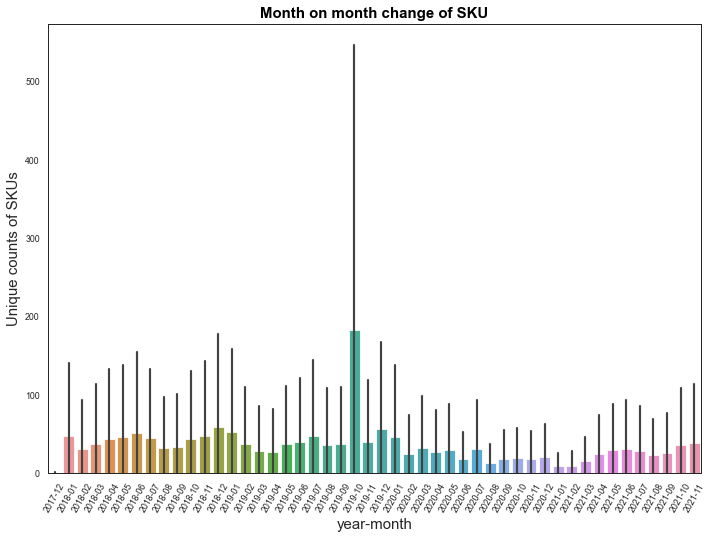

,year,Unique counts of SKUs
0,2017,23
1,2018,13290
2,2019,17587
3,2020,9691
4,2021,7978


In [7]:
##Year and month wise Unique SKU counts ##

import matplotlib.pyplot as plt
import datetime as dt
import seaborn as sns
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.set_context("paper", rc={"font.size":12,"axes.titlesize":15,"axes.labelsize":15})
sns.set_style('white')




df_polloi_filt_col['year-month']=df_polloi_filt_col['Date'].dt.to_period('M')


df_polloi_filt_col['Lineitem_sku_processed']=df_polloi_filt_col['Lineitem sku'].apply(str).str.lower().apply(lambda x: x.strip())




df_sku_month_yr = df_polloi_filt_col.groupby(['year','year-month','month']).agg({'Lineitem_sku_processed': 'nunique'}).reset_index().rename(columns={'Lineitem_sku_processed': 'Unique counts of SKUs'})

# df_sku_month_yr.to_excel('C:/Users/KINSUK/Desktop/DS_Freelancing/RTB_Analyttica/Acai_Sales_Analysis_May2021/sku_analysis.xlsx')


sns.barplot(y='Unique counts of SKUs', x='year-month',data=df_sku_month_yr)
plt.xticks(rotation=60)


plt.xticks(rotation=60)

plt.title('Month on month change of SKU',fontsize=15,color="black",fontweight='bold')
plt.show()


df_sku_yr = df_polloi_filt_col.groupby(['year']).agg({'Lineitem_sku_processed': 'nunique'}).reset_index().rename(columns={'Lineitem_sku_processed': 'Unique counts of SKUs'})

df_sku_yr








In [8]:
## New Launch analysis (Not adding any value) : ###

print("Total number of unique SKUs %d : "  % len(df_polloi_filt_col['Lineitem_sku_processed'].unique()))



df_polloi_filt_col['Lineitem_name_processed']=df_polloi_filt_col['Lineitem name'].apply(str).str.lower().apply(lambda x: x.strip())


df_polloi_filt_col['SKU_Code']=pd.factorize(df_polloi_filt_col['Lineitem_name_processed'])[0]+1

df_sku_max_yr= df_polloi_filt_col.groupby(['year']).agg({'SKU_Code':'max'}).reset_index().\
rename(columns={'SKU_Code':'Max_sku_count_year'})

df_sku_max_mth= df_polloi_filt_col.groupby(['year-month']).agg({'SKU_Code':'max'}).reset_index().\
rename(columns={'SKU_Code':'Max_sku_count_mth'})

df_sku_max_yr['New Launches year']= df_sku_max_yr['Max_sku_count_year']- df_sku_max_yr['Max_sku_count_year'].shift(1)


df_sku_max_mth['New Launches month']= df_sku_max_mth['Max_sku_count_mth']- df_sku_max_mth['Max_sku_count_mth'].shift(1)

df_sku_max_mth.head(2)

df_sku_max_yr

df_sku_max_mth

df_sku_max_yr

Total number of unique SKUs 38820 : 


,year,Max_sku_count_year,New Launches year
0,2017,39175,NaN
1,2018,39173,-2.0
2,2019,39130,-43.0
3,2020,16355,-22775.0
4,2021,8041,-8314.0


In [9]:

##Customer retention analysis : 

df_username =df_polloi_filt_col.copy()

df_username=df_username[df_username['username'].notnull()]

df_username['year_numeric']=df_username['year'].astype(int)
df_username.head()


for year in (2016,2017,2018,2019,2020,2021):
    next_username_list= []
    prev_username_list =[]
    common_users_set =set()
    
    year_prev_str=year
    year_next_str =year+1
    
    df_prev= df_username[df_username['year_numeric']<=year_prev_str]
    prev_username_list=df_prev['username'].str.lower().unique().tolist()
    
    df_next = df_username[df_username['year_numeric']==year_next_str]
    next_username_list=df_next['username'].str.lower().unique().tolist()
    
    common_users_set = set(next_username_list) & set(prev_username_list)

    print("Total number of unique customers for ", year_next_str , "is %d:" %len(next_username_list))

    print ("Common Customers between year :",year_prev_str , 'and' ,year_next_str , 'is %d: '  %len(common_users_set))
    
print("Total number of unique customers for the period : %d " %len(df_username['username'].str.lower().unique()))

Total number of unique customers for  2017 is 16:
Common Customers between year : 2016 and 2017 is 0: 
Total number of unique customers for  2018 is 21305:
Common Customers between year : 2017 and 2018 is 8: 
Total number of unique customers for  2019 is 17565:
Common Customers between year : 2018 and 2019 is 6076: 
Total number of unique customers for  2020 is 15151:
Common Customers between year : 2019 and 2020 is 6488: 
Total number of unique customers for  2021 is 12811:
Common Customers between year : 2020 and 2021 is 5624: 
Total number of unique customers for  2022 is 0:
Common Customers between year : 2021 and 2022 is 0: 
Total number of unique customers for the period : 48652 


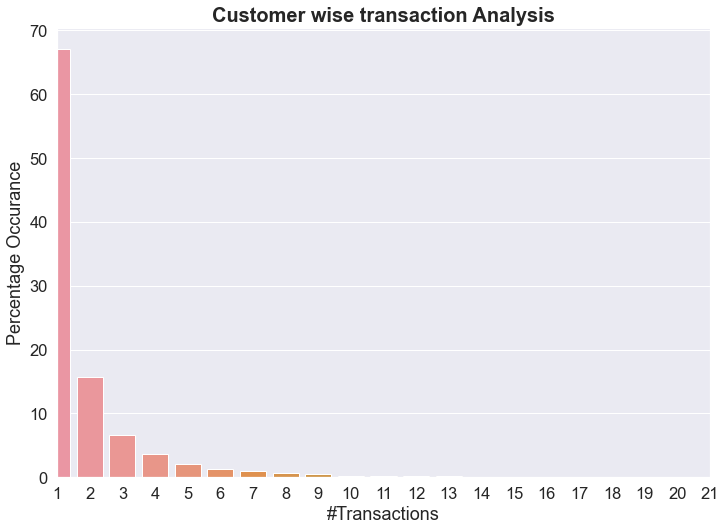

In [10]:

##User vs # of transastions distribution


import seaborn as sns
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.set_context("paper", rc={"font.size":15,"axes.titlesize":15,"axes.labelsize":15})   
import matplotlib.pyplot as plt


df_polloi_filt_col['username_processed']=df_polloi_filt_col['username'].str.lower().apply(lambda x: x.strip())

df_full= df_polloi_filt_col[df_polloi_filt_col['Financial Status']=='paid']
df_full=df_full[df_full['username_processed'].notnull()]
df_full['username_processed']=df_full['username_processed'].astype(str)


df_basket=df_full.groupby(['username_processed']).agg({'Name': pd.Series.nunique}).reset_index().rename(columns={'Name': '#Transactions'})

df_customer_basket_count=df_basket.groupby('#Transactions').agg({'username_processed':'count'}).reset_index().rename(columns={'username_processed': 'Total_occurance'})
df_customer_basket_count['Percentage Occurance'] = round(100*df_customer_basket_count['Total_occurance']/df_customer_basket_count['Total_occurance'].sum(),2)
# df_customer_basket_count

df_customer_basket_count

sns.set_style('white')
sns.set(font_scale = 1.5)
sns.barplot(y='Percentage Occurance', x='#Transactions',data=df_customer_basket_count).set_title('Customer wise transaction Analysis',
                                                                                                  fontdict= { 'fontsize': 20, 'fontweight':'bold'})

plt.xlim(0,20)
plt.show()

# df_customer_basket_count.to_excel('H:/Kinsuk/DS_Freelancing/RTB_Analyttica/Oi_Polloi_CRM_Analysis_Dec21/Customerwise_transaction_Analysis.xlsx')

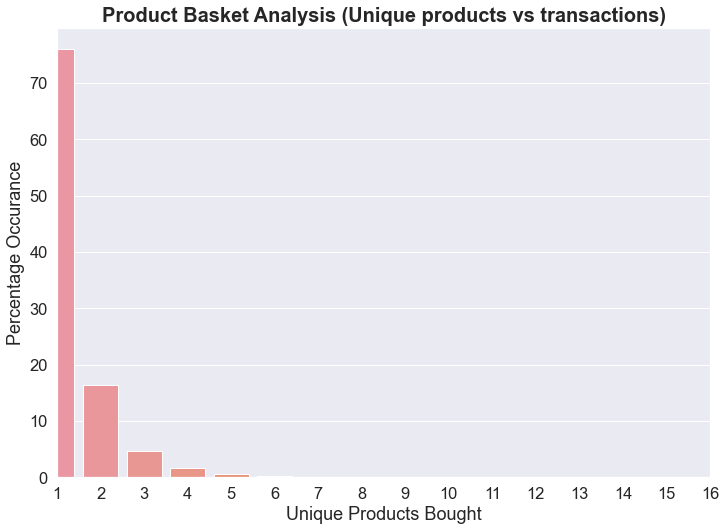

In [11]:
##Basket Distribution :
## Customer wise finding no of qtys. of unique products :

import seaborn as sns
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.set_context("paper", rc={"font.size":15,"axes.titlesize":25,"axes.labelsize":25})  
sns.set(font_scale = 1.4)
# sns.set_style('white')
sns.set_style("whitegrid", {'axes.grid' : False})

import matplotlib.pyplot as plt
df_polloi_filt_col['Lineitem_name_processed']=df_polloi_filt_col['Lineitem name'].apply(str).str.lower().apply(lambda x: x.strip())

df_full= df_polloi_filt_col[df_polloi_filt_col['Financial Status']=='paid']


df_basket=df_full.groupby(['Name']).agg({'Lineitem_name_processed': pd.Series.nunique}).reset_index().rename(columns={'Lineitem_name_processed': 'Unique Products Bought'})
# df_basket.head()
df_product_basket_count=df_basket.groupby('Unique Products Bought').agg({'Name':'count'}).reset_index().rename(columns={'Name': 'Total_occurance'})
df_product_basket_count['Percentage Occurance'] = round(100*df_product_basket_count['Total_occurance']/df_product_basket_count['Total_occurance'].sum(),2)
# df_product_basket_count

sns.set_style('white')
sns.set_style('white')
sns.set(font_scale = 1.5)
# sns.set(xlim=(0,15))
sns.barplot(y='Percentage Occurance', x='Unique Products Bought',data=df_product_basket_count).set_title('Product Basket Analysis (Unique products vs transactions)',
                                                                                                  fontdict= { 'fontsize': 20, 'fontweight':'bold'})

plt.xlim(0,15)
plt.show()


In [15]:
##New launch analysis :

df_sku_first_launch= df_full.groupby('Lineitem_name_processed').agg({'year-month':'min'}).\
reset_index().rename(columns={'year-month': 'First_Launch_Month'})

df_sku_launch_mth_wise=df_sku_first_launch.groupby('First_Launch_Month').agg({'Lineitem_name_processed':'nunique'}).\
reset_index().rename(columns={'Lineitem_name_processed': 'No. of new launches'}).sort_values(by=['First_Launch_Month'])


df_sku_launch_mth_wise.head()

df_sku_launch_mth_wise.to_csv('H:/Kinsuk/DS_Freelancing/RTB_Analyttica/Oi_Polloi_CRM_Analysis_Dec21/df_sku_launch_mth_wise.csv')


In [ ]:
import pandas_profiling
from ipywidgets import interact, Button
from pandas_profiling import ProfileReport
from pandas_profiling.utils.cache import cache_file

profile = ProfileReport(df_polloi_filt_col,explorative = True)
profile.to_notebook_iframe()

   Price Bracket bin  Count of customers  Revenue Generated  \
0                  0              105339         3116112.54   
1                  1               82210         5931443.89   
2                  2               25885         3156792.27   
3                  3               20020         4527544.38   

   Percentage of customers  Percentage of revenue Price Bracket Range  
0                    45.12                  18.62      (-0.001, 50.0]  
1                    35.21                  35.45       (50.0, 100.0]  
2                    11.09                  18.87      (100.0, 150.0]  
3                     8.58                  27.06     (150.0, 1812.5]  
count    233454.000000
mean         71.671049
std          63.732231
min           0.000000
25%          33.330000
50%          56.670000
75%          90.830000
max        1812.500000
Name: Lineitem price, dtype: float64


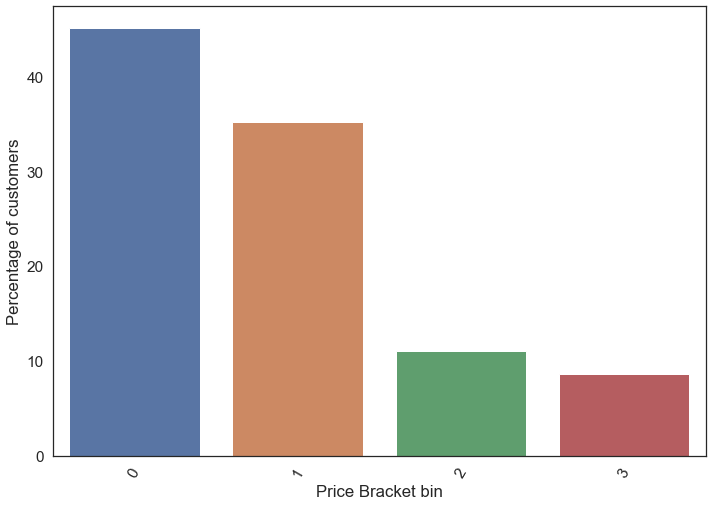

,Price Bracket bin,Count of customers,Revenue Generated,Percentage of customers,Percentage of revenue,Price Bracket Range
0,0,105339,3116112.54,45.12,18.62,"(-0.001, 50.0]"
1,1,82210,5931443.89,35.21,35.45,"(50.0, 100.0]"
2,2,25885,3156792.27,11.09,18.87,"(100.0, 150.0]"
3,3,20020,4527544.38,8.58,27.06,"(150.0, 1812.5]"


In [19]:
## Price brakcet distribution :

sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.set_context("paper", rc={"font.size":15,"axes.titlesize":25,"axes.labelsize":25})  
sns.set(font_scale = 1.4)
sns.set_style('white')

df_full=df_polloi_filt_col.copy()

# pd.cut(test.days, [0,30,60], include_lowest=True)

df_full['Price Bracket Range']=pd.cut(df_full['Lineitem price'],[0,50,100,150,max(df_full['Lineitem price'])],include_lowest=True)
df_full['Price Bracket bin']=pd.cut(df_full['Lineitem price'],[0,50,100,150,max(df_full['Lineitem price'])],include_lowest=True,labels=False)

price_bracket_pivot=df_full.groupby(['Price Bracket bin']).agg({'Name':'count','Lineitem price':'sum'}).reset_index()\
.rename(columns={'Name':'Count of customers','Lineitem price':'Revenue Generated'})

price_bracket_pivot['Percentage of customers'] = round(100*price_bracket_pivot['Count of customers']/price_bracket_pivot['Count of customers'].sum(),2)
price_bracket_pivot['Percentage of revenue'] = round(100*price_bracket_pivot['Revenue Generated']/price_bracket_pivot['Revenue Generated'].sum(),2)
price_bracket_pivot.head()

df_price_range=df_full[['Price Bracket bin','Price Bracket Range']].drop_duplicates()
price_bracket_pivot=price_bracket_pivot.merge(df_price_range,on='Price Bracket bin',how='left')

ax = sns.barplot(x="Price Bracket bin", y="Percentage of customers", data=price_bracket_pivot)
ax.set(ylabel="Percentage of customers")


print(price_bracket_pivot)
print(df_full['Lineitem price'].describe())

plt.xticks(rotation=60)
plt.show()



##Category wise price analysis : 

df_price_cat = df_full.groupby('Final_Category').agg({'Lineitem price':[np.mean, np.median,np.max,np.min]})
df_price_cat

price_bracket_pivot

In [13]:
## Postal code wise sales value analysis :

import folium
import pgeocode


df_full_uk=df_full[(df_full['Shipping Country'] == "GB")]
df_sales_zip_uk= df_full_uk.groupby('Shipping Zip').agg({'Name': lambda qty: qty.count()}).sort_values(by=['Name'],ascending=False).reset_index()

nomi = pgeocode.Nominatim("gb")

dfzip = df_sales_zip_uk["Shipping Zip"].apply(lambda x:nomi.query_postal_code(x))
dfzip_final_uk = pd.concat([df_sales_zip_uk, dfzip], axis="columns")
dfzip_final_uk.head()
#for each row in the df_sales_zip dataset, plot the corresponding latitude and longitude on the map




,Shipping Zip,Name,postal_code,country_code,place_name,state_name,state_code,county_name,county_code,community_name,community_code,latitude,longitude,accuracy
0,M41LQ,1631,M41LQ,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,S70 6LT,251,S70,GB,"Barnsley, Birdwell, Worsbrough",England,ENG,South Yorkshire,2637273,NaN,NaN,53.5500,-1.477333,4.0
2,W85SW,235,W85SW,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,M4 1LQ,207,M4,GB,Manchester,England,ENG,Greater Manchester,2648108,NaN,NaN,53.4809,-2.237400,4.0
4,BA2 4NG,185,BA2,GB,"Bathampton, Corston, Priston, Peasedown St Joh...",England,ENG,Somerset,11609046,NaN,NaN,51.3934,-2.391057,4.0


In [ ]:
## Creation of heatmap for Great Britain : 

from folium import plugins
from folium.plugins import HeatMap

dfzip_final_uk_NoNaN=dfzip_final_uk[(dfzip_final_uk['latitude'].notnull()) & (dfzip_final_uk['longitude'].notnull())]

map_uk = folium.Map(location=[51.5074, 0.1278], zoom_start = 5,width=1000, height=1000) 
folium.Figure(width=1000, height=1000)

for i,row in dfzip_final_uk_NoNaN.iterrows():
    folium.CircleMarker((row.latitude,row.longitude), radius=3, weight=2, color='red', fill_color='red', fill_opacity=.5).add_to(map_uk)

    
map_uk.add_child(plugins.HeatMap(data=dfzip_final_uk_NoNaN[['latitude', 'longitude','Name']], radius=15, blur=5))

# save the map as an html
map_uk.save('map_uk_heatmap.html')
map_uk

# <font color='red'>C. Market Basket Analysis :  </font>

In [13]:
##Basket Distribution :
## Customer wise finding no of qtys. :

df_full= df_polloi_filt_col[df_polloi_filt_col['Financial Status']=='paid']

df_full['year']=df_full['year'].astype(int)

df_full2= df_full[df_full['year'] >= 2020]

df_basket=df_full2.groupby(['Name']).agg({'Lineitem_name_processed': pd.Series.nunique,'Lineitem quantity':'sum'}).reset_index().rename(columns={'Lineitem_name_processed': 'Basket_Size'})


df_basket_filtd= df_basket[df_basket['Basket_Size']>1]
print(len(df_basket_filtd))
df_basket_filtd.head()

Trans_list_grt1 = df_basket_filtd['Name'].tolist()
print(len(Trans_list_grt1))

df_basket_filtd_colmns= df_full[df_full.Name.isin(Trans_list_grt1)]
print(len(df_basket_filtd_colmns))

8851
8851
22565


In [14]:
df_grouped_trans=df_basket_filtd_colmns.groupby('Name')['Lineitem_name_processed'].apply(list).reset_index(name='Itemsets')
transactions=df_grouped_trans['Itemsets'].tolist()


In [15]:
df_basket_total=df_basket_filtd_colmns[['Name','Lineitem_name_processed','Lineitem quantity']]

market_basket = df_basket_total.groupby(
                ['Name', 'Lineitem_name_processed'])['Lineitem quantity']
market_basket = market_basket.sum().unstack().reset_index().fillna(0).set_index('Name')

market_basket['Basket_Size']= market_basket.sum(axis = 1, skipna = True)
market_basket_filtd=market_basket[market_basket['Basket_Size']>1]
market_basket_filtd.head()

Lineitem_name_processed,1954 501 jeans (new rinse) - 36 / 34,1954 501z jeans (pinwheel) - 34/34,1967 505 jeans (rigid) - 30 / 34,1975 519 cord jeans (white) - 30/32,20oz terry ribbed rugby shirt (sand pink) - l,20oz terry ribbed rugby shirt (sand pink) - m,271424,273193,5 baggies long short stone blue,501 original jeans (new chapter warp selvedge) - 34/32,...,yogi orson suede (sand) - 9,yogi willard reverse vamp (stone) - uk 10,yogi willard reverse vamp (stone) - uk 11,yogi willard reverse vamp (stone) - uk 8,yogi willard reverse vamp (stone) - uk 9,yogi willard shoes (tan tumbled leather) - uk 9,yogi willard tumbled (tan) - 8,yogi willard tumbled (tan) - 9,yogi ymc orson recycled leather (burnt orange) - uk 8,Basket_Size
Name,,,,,,,,,,,,,,,,,,,,,
#24-9567,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0
#243136,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0
#243145,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0
#243158,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0
#243164,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0


In [17]:
# market_basket_filtd.to_csv('H:/Kinsuk/DS_Freelancing/RTB_Analyttica/Oi_Polloi_CRM_Analysis_Dec21/market_basket_filtd.csv')

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
market_basket_filtd=pd.read_csv('H:/Kinsuk/DS_Freelancing/RTB_Analyttica/Oi_Polloi_CRM_Analysis_Dec21/market_basket_filtd.csv')
market_basket_filtd.head()

,Name,1954 501 jeans (new rinse) - 36 / 34,1954 501z jeans (pinwheel) - 34/34,1960's casual stripe tee (mint stripe) - xl,1960's casual stripe tee (red block) - l,1967 505 jeans (rigid) - 30 / 34,1967 505 jeans (rigid) - 34 / 34,1975 519 cord jeans (white) - 30/32,20oz terry ribbed rugby shirt (sand pink) - l,20oz terry ribbed rugby shirt (sand pink) - m,...,yogi willard tumbled (ivory) - 8,yogi willard tumbled (ivory) - 9,yogi willard tumbled (mid brown) - uk 8,yogi willard tumbled (mid brown) - uk 9,yogi willard tumbled (tan) - 10,yogi willard tumbled (tan) - 11,yogi willard tumbled (tan) - 8,yogi willard tumbled (tan) - 9,yogi ymc orson recycled leather (burnt orange) - uk 8,Basket_Size
0,#117044,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0
1,#117048,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0
2,#117057,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0
3,#117059,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0
4,#117069,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0


In [16]:
market_basket_filtd= market_basket_filtd.iloc[:, :-1]
print(len(market_basket_filtd))
market_basket_filtd.head()

8851


Lineitem_name_processed,1954 501 jeans (new rinse) - 36 / 34,1954 501z jeans (pinwheel) - 34/34,1967 505 jeans (rigid) - 30 / 34,1975 519 cord jeans (white) - 30/32,20oz terry ribbed rugby shirt (sand pink) - l,20oz terry ribbed rugby shirt (sand pink) - m,271424,273193,5 baggies long short stone blue,501 original jeans (new chapter warp selvedge) - 34/32,...,yogi orson suede (olive) - uk 9,yogi orson suede (sand) - 9,yogi willard reverse vamp (stone) - uk 10,yogi willard reverse vamp (stone) - uk 11,yogi willard reverse vamp (stone) - uk 8,yogi willard reverse vamp (stone) - uk 9,yogi willard shoes (tan tumbled leather) - uk 9,yogi willard tumbled (tan) - 8,yogi willard tumbled (tan) - 9,yogi ymc orson recycled leather (burnt orange) - uk 8
Name,,,,,,,,,,,,,,,,,,,,,
#24-9567,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
#243136,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
#243145,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
#243158,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
#243164,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [17]:
## One hot encoding of the different SKUs to understand which are bought tohgether. 

def encode_units(x):
    if x <= 0:
        return 0
    if x >= 1:
        return 1

basket_sets = market_basket_filtd.applymap(encode_units)
# basket_sets.drop('POSTAGE', inplace=True, axis=1)
basket_sets.head()

Lineitem_name_processed,1954 501 jeans (new rinse) - 36 / 34,1954 501z jeans (pinwheel) - 34/34,1967 505 jeans (rigid) - 30 / 34,1975 519 cord jeans (white) - 30/32,20oz terry ribbed rugby shirt (sand pink) - l,20oz terry ribbed rugby shirt (sand pink) - m,271424,273193,5 baggies long short stone blue,501 original jeans (new chapter warp selvedge) - 34/32,...,yogi orson suede (olive) - uk 9,yogi orson suede (sand) - 9,yogi willard reverse vamp (stone) - uk 10,yogi willard reverse vamp (stone) - uk 11,yogi willard reverse vamp (stone) - uk 8,yogi willard reverse vamp (stone) - uk 9,yogi willard shoes (tan tumbled leather) - uk 9,yogi willard tumbled (tan) - 8,yogi willard tumbled (tan) - 9,yogi ymc orson recycled leather (burnt orange) - uk 8
Name,,,,,,,,,,,,,,,,,,,,,
#24-9567,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
#243136,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
#243145,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
#243158,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
#243164,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [42]:
df_grouped_trans=df_basket_filtd_colmns.groupby('Name')['Lineitem_name_processed'].apply(list).reset_index(name='Itemsets')


transactions=df_grouped_trans['Itemsets'].tolist()

In [43]:
# Training Apriori algorithm on the dataset
# https://stackabuse.com/association-rule-mining-via-apriori-algorithm-in-python
from apyori import apriori
rule_list = apriori(transactions, min_support = 0.003, min_confidence = 0.3, min_lift = 3, min_length = 2)

In [44]:
for item in rule_list:

    # first index of the inner list
    # Contains base item and add item
    pair = item[0] 
    items = [x for x in pair]
    print("Rule: " + items[0] + " -> " + items[1])

    #second index of the inner list
    print("Support: " + str(item[1]))

    #third index of the list located at 0th
    #of the third index of the inner list

    print("Confidence: " + str(item[2][0][2]))
    print("Lift: " + str(item[2][0][3]))
    print("=====================================")

Rule: oi polloi gift card - â£20 -> oi polloi gift card - â£10
Support: 0.008473618800135578
Confidence: 0.7352941176470588
Lift: 50.84443933823529
Rule: oi polloi gift card - â£50 -> oi polloi gift card - â£10
Support: 0.0036154106880578467
Confidence: 0.3137254901960784
Lift: 33.45523269548783
Rule: oi polloi gift card - â£100 -> oi polloi gift card - â£50
Support: 0.0032764659360524236
Confidence: 0.7435897435897437
Lift: 79.29533518690147
Rule: oi polloi gift card - â£20 -> oi polloi gift card - â£5
Support: 0.004067337024065077
Confidence: 0.7826086956521738
Lift: 54.11616847826086
Rule: oi polloi gift card - â£20 -> oi polloi gift card - â£50
Support: 0.0036154106880578467
Confidence: 0.3855421686746988
Lift: 26.65963855421687


In [18]:
#Now that the data is structured properly, we can generate frequent item sets that have a support of at least 7%

from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules
from mlxtend.frequent_patterns.fpgrowth import fpgrowth
# from mlxtend.frequent_patterns import fpgrowthbasket_sets
from mlxtend.frequent_patterns import association_rules

frequent_itemsets = fpgrowth(basket_sets, min_support=0.007,use_colnames=True)

frequent_itemsets

frequent_itemsets.to_csv('H:/Kinsuk/DS_Freelancing/RTB_Analyttica/Oi_Polloi_CRM_Analysis_Dec21/frequent_itemsets.csv')

In [53]:
items = df_basket_filtd_colmns.groupby(['Name'])\
.agg({'Lineitem_name_processed': lambda x: x.ravel().tolist()}).reset_index().rename(columns={'Lineitem_name_processed':'itemsets'})

items.head()

,Name,itemsets
0,#24-9567,"[novesta star master mono (beige) - eu 42, pat..."
1,#243136,[patagonia p-6 logo trucker hat (navy blue / n...
2,#243145,[norse projects niels bubble t-shirt (dark nav...
3,#243158,"[didriksons swen jacket (driftwood brown) - l,..."
4,#243164,"[birkenstock arizona sfb, patagonia spriger mo..."


In [55]:
import itertools
import pandas as pd

combinations_list = []
for row in items.itemsets:
    combinations = list(itertools.combinations(row, 2))
    combinations_list.append(combinations)

combinations_list[:2]

combination_counts = pd.Series(combinations_list).explode().reset_index(drop=True)

combination_counts[:5]
combination_counts.value_counts()[:10]

df_combination= pd.DataFrame(combination_counts.value_counts())

df_combination.head()

,0
"(oi polloi gift card - â£10, oi polloi gift card - â£20)",56
"(patagonia p-6 logo responsibili-tee (white) - s, patagonia p-6 logo responsibili-tee (white) - m)",36
"(oi polloi gift card - â£50, oi polloi gift card - â£100)",31
"(oi polloi gift card - â£20, oi polloi gift card - â£50)",30
"(oi polloi gift card - â£5, oi polloi gift card - â£20)",30


In [57]:
# Training Apriori algorithm on the dataset

from apyori import apriori

rule_list = apriori(transactions, min_support = 0.003, min_confidence = 0.03, min_lift = 2, min_length = 2)
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=0.0000001)
rules


# frequent_itemsets.to_excel("C:/Users/KINSUK/Desktop/DS_Freelancing/RTB_Analyttica/Acai_Sales_Analysis_May2021/New_analysis_Sept-21/frequent_itemsets.xlsx",sheet_name = 'frequent_itemsets')


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(oi polloi gift card - â£20),(oi polloi gift card - â£10),0.014462,0.011524,0.008474,0.585938,50.844439,0.008307,2.387262
1,(oi polloi gift card - â£10),(oi polloi gift card - â£20),0.011524,0.014462,0.008474,0.735294,50.844439,0.008307,3.723145
